#UBER Trip Analysis

Cell 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact

Cell 2: Define the Insert Button and File Upload Function


In [2]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the uploaded file into a DataFrame
file_name = next(iter(uploaded))  # Get the name of the uploaded file
df = pd.read_csv(file_name)
print("CSV file loaded successfully!")
print(df.head())

Saving UberDataset.csv to UberDataset.csv
CSV file loaded successfully!
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


Cell 3: Convert Date Columns and Calculate Duration


In [3]:
# Convert Date Columns to Datetime Format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Calculate the duration of each trip in minutes
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

# Check for missing values in the duration column
print(df[['START_DATE', 'END_DATE', 'DURATION']].isna().sum())

# Drop rows with missing duration values
df = df.dropna(subset=['DURATION'])

# Remove rows with missing values to clean the data
df.dropna(inplace=True)

# Check if there are any null values in the dataframe
print(df.isnull().sum())

START_DATE    735
END_DATE      736
DURATION      736
dtype: int64
START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
DURATION      0
dtype: int64


Cell 4: Bar Chart for Total Miles Driven per Purpose


<ipython-input-4-deb9d8a4a3e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('PURPOSE')['MILES'].sum().index,


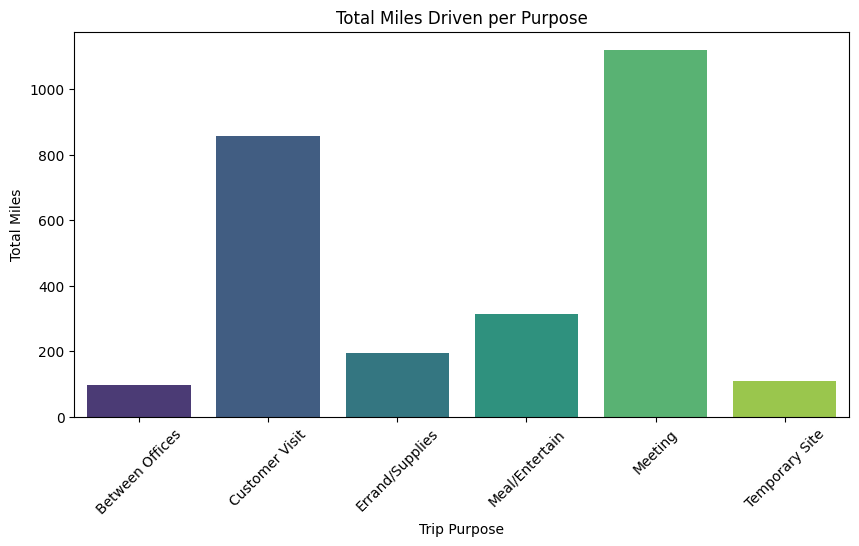

In [4]:
# Bar chart showing total miles driven for each purpose
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('PURPOSE')['MILES'].sum().index,
            y=df.groupby('PURPOSE')['MILES'].sum().values,
            palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Trip Purpose")
plt.ylabel("Total Miles")
plt.title("Total Miles Driven per Purpose")
plt.show()

Cell 5: Top 10 Start Locations


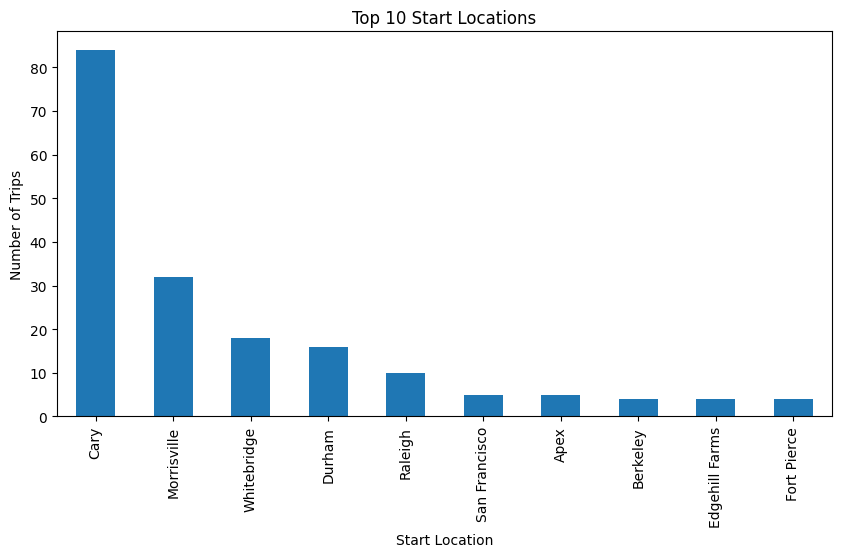

In [5]:
# Identify Top 10 Start locations
plt.figure(figsize=(10, 5))
df['START'].value_counts().head(10).plot(kind='bar', color='#1f77b4')
plt.xlabel("Start Location")
plt.ylabel("Number of Trips")
plt.title("Top 10 Start Locations")
plt.show()

Cell 6: Top 10 Stop Locations


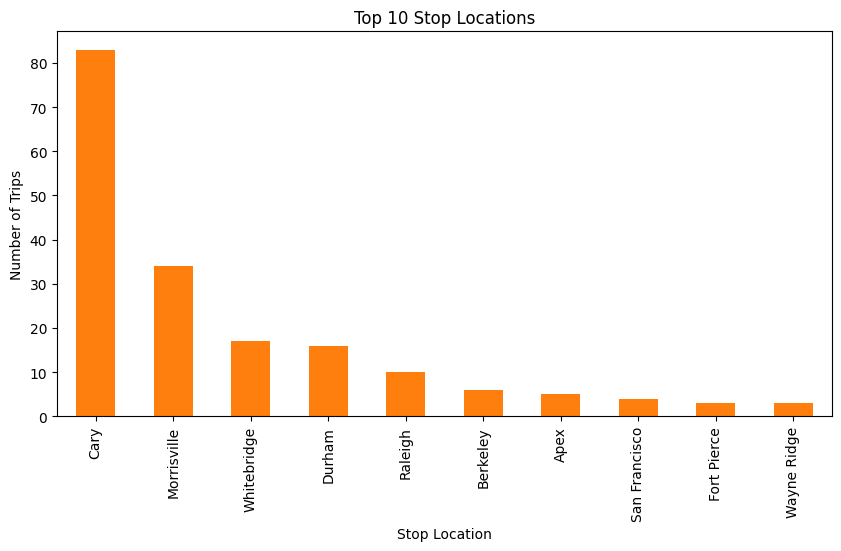

In [6]:
# Identify Top 10 Stop locations
plt.figure(figsize=(10, 5))
df['STOP'].value_counts().head(10).plot(kind='bar', color='#ff7f0e')
plt.xlabel("Stop Location")
plt.ylabel("Number of Trips")
plt.title("Top 10 Stop Locations")
plt.show()

Cell 7: Trip Category Distribution


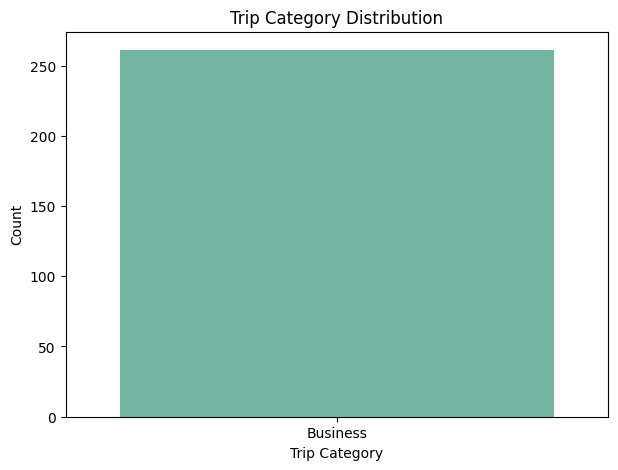

In [7]:
# Trip Category Distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='CATEGORY', hue='CATEGORY', palette='Set2', legend=False)
plt.xlabel("Trip Category")
plt.ylabel("Count")
plt.title("Trip Category Distribution")
plt.show()

Cell 8: Trip Purpose Distribution


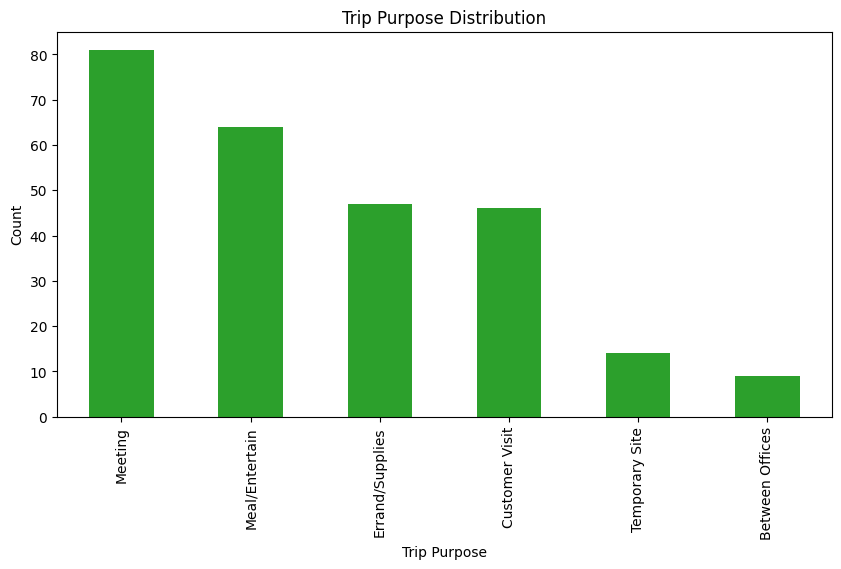

In [8]:
# Trip Purpose Distribution
plt.figure(figsize=(10, 5))
df['PURPOSE'].value_counts().plot(kind='bar', color='#2ca02c')
plt.xlabel("Trip Purpose")
plt.ylabel("Count")
plt.title("Trip Purpose Distribution")
plt.show()

Cell 9: Histogram for Trip Durations


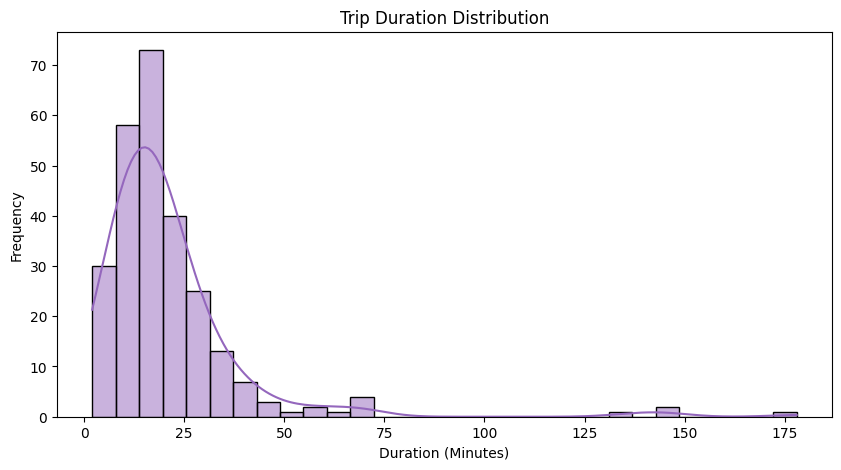

In [9]:
# Histogram to analyze trip durations
plt.figure(figsize=(10, 5))
sns.histplot(df['DURATION'], bins=30, kde=True, color='#9467bd')
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")
plt.show()

Cell 10: Basic Statistics of Uber Trip Data


In [10]:
# Print basic statistics of the dataset
print("Basic Stats of Uber Trip Data:")
print(df.describe())

Basic Stats of Uber Trip Data:
                          START_DATE                       END_DATE  \
count                            261                            261   
mean   2016-06-01 16:09:56.091954176  2016-06-01 16:31:09.425287168   
min              2016-01-01 21:11:00            2016-01-01 21:17:00   
25%              2016-03-04 11:46:00            2016-03-04 12:06:00   
50%              2016-05-10 09:03:00            2016-05-10 09:20:00   
75%              2016-07-06 23:46:00            2016-07-06 23:59:00   
max              2016-12-12 20:48:00            2016-12-12 20:57:00   
std                              NaN                            NaN   

            MILES    DURATION  
count  261.000000  261.000000  
mean    10.314559   21.222222  
min      0.500000    2.000000  
25%      3.300000   11.000000  
50%      6.900000   17.000000  
75%     10.400000   24.000000  
max    174.200000  178.000000  
std     18.642603   20.329886  
